In [1]:
import tequila as tq
import numpy as np
from utility import *
import matplotlib.pyplot as plt

# Obtaining system Hamiltonians for NH3 symmetric bond stretch in minimal basis

In [2]:
basis = 'sto-3g'

geometries = np.arange(0.5, 2.2, 0.2)

PES_configs = []

print('Generating NH3 electronic Hamiltonians at...')

for R in geometries:
    print('R = {}'.format(round(R,2)))
    
    nh3_moldata_R = get_molecular_data('nh3', R, xyz_format=True)
        
    nh3_R = tq.quantumchemistry.Molecule(nh3_moldata_R, basis)
    
    PES_configs.append(nh3_R)


Generating NH3 electronic Hamiltonians at...
R = 0.5
R = 0.7
R = 0.9
R = 1.1
R = 1.3
R = 1.5
R = 1.7
R = 1.9
R = 2.1


# Compute FCI PES

In [3]:
FCI_energies = []

for R_i in range(len(geometries)):
    
    fci_result = PES_configs[R_i].compute_energy(method='fci')
    print("R = {} | E = {} Eh".format(round(geometries[R_i],2), fci_result))
    
    FCI_energies.append(fci_result)


R = 0.5 | E = -52.44294693856378 Eh
R = 0.7 | E = -54.836917757372525 Eh
R = 0.9 | E = -55.44295420442609 Eh
R = 1.1 | E = -55.520372538271445 Eh
R = 1.3 | E = -55.43891986163804 Eh
R = 1.5 | E = -55.329407824987236 Eh
R = 1.7 | E = -55.238353570818575 Eh
R = 1.9 | E = -55.177779108285904 Eh
R = 2.1 | E = -55.14546825875257 Eh


# Compute HF PES

In [4]:
HF_energies = []

for R_i in range(len(geometries)):
    
    hf_result = PES_configs[R_i].compute_energy(method='hf')
    print("R = {} | E = {} Eh".format(round(geometries[R_i],2), hf_result))
    
    HF_energies.append(hf_result)


R = 0.5 | E = -52.42388235247115 Eh
R = 0.7 | E = -54.805156004886314 Eh
R = 0.9 | E = -55.39249807108334 Eh
R = 1.1 | E = -55.441550716848646 Eh
R = 1.3 | E = -55.31601299924375 Eh
R = 1.5 | E = -55.140637594749066 Eh
R = 1.7 | E = -54.961086396289836 Eh
R = 1.9 | E = -54.7945462944081 Eh
R = 2.1 | E = -54.65066541288485 Eh


# Compute CCSD PES

In [9]:
CCSD_energies = []

for R_i in range(len(geometries)):
    
    ccsd_result = PES_configs[R_i].compute_energy(method='ccsd')
    print("R = {} | E = {} Eh".format(round(geometries[R_i],2), ccsd_result))
    CCSD_energies.append(ccsd_result)
    
    

R = 0.5 | E = -52.44291428982974 Eh
R = 0.7 | E = -54.83686549565489 Eh
R = 0.9 | E = -55.442836405289164 Eh
R = 1.1 | E = -55.52001524855134 Eh
R = 1.3 | E = -55.43791960375229 Eh
R = 1.5 | E = -55.327446129300164 Eh
R = 1.7 | E = -55.23782673806206 Eh
R = 1.9 | E = -55.20086851348494 Eh
R = 2.1 | E = -55.23050458338292 Eh


Text(0, 0.5, 'E, Hartree')

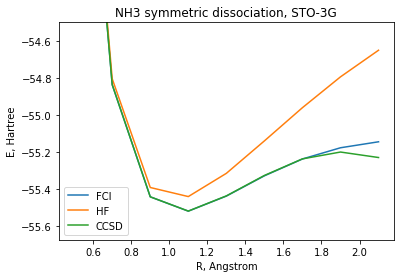

In [10]:
plt.title('NH3 symmetric dissociation, STO-3G')
plt.plot(geometries, FCI_energies, label='FCI')
plt.plot(geometries, HF_energies, label='HF')
plt.plot(geometries, CCSD_energies, label='CCSD')
plt.legend()
plt.ylim(top=-54.5)
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')